In this lab we will train a neural network model to classify images of clothing. 

The lab is designed to be run using Google Colab, but also can be run as a normal jupyter notebook with minor modifications.

This lab uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [1]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


## Import the Fashion MNIST dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Examine the dataset size.
1. What are the sizes of each image? 
2. How many categories are there?
3. How many images are there in the test and training sets?
4. What are the range of values for the images? 
    
    Ans: Pixel value ranges from 0-255

In [4]:
train_images[0].shape

(28, 28)

In [5]:
len(np.unique(train_labels))

10

In [6]:
len(train_images) + len(test_images)

70000

In [7]:
print("Pixel Values ranges from min = ",train_images.min()," and max = ", train_images.max())

Pixel Values ranges from min =  0  and max =  255


Preprocess the data by scaling the pixel values of all images to fall between 0 and 1.

In [8]:
train_images_scaled = train_images / 255
test_images_scaled = test_images / 255

To verify that the data is in the correct format  display the first 10 images from the *training set* and display the class name below each image.


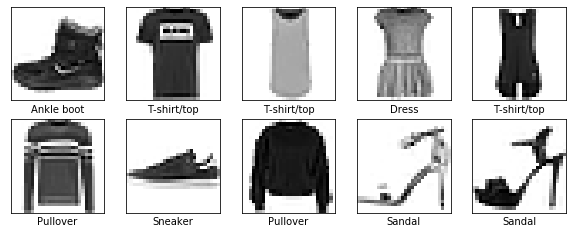

In [9]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images_scaled[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Using Keras, build a neural network with a single hidden layer consisting of 64 neurons. Remember that you will either have to reshape the image data into 1D vectors, or use a flatten layer at the input.
1. Set up the model layers
2. Compile the model 
3. Print the model summary

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

## Train the model

Train the model on the training images for 20 epochs.




In [18]:
model.fit(train_images, train_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 134us/sample - loss: 2.3049 - accuracy: 0.6088
Epoch 2/20
60000/60000 [==============================] - 7s 115us/sample - loss: 0.8123 - accuracy: 0.6980
Epoch 3/20
60000/60000 [==============================] - 7s 123us/sample - loss: 0.7062 - accuracy: 0.7194
Epoch 4/20
60000/60000 [==============================] - 7s 123us/sample - loss: 0.6777 - accuracy: 0.7263
Epoch 5/20
60000/60000 [==============================] - 15s 245us/sample - loss: 0.6483 - accuracy: 0.7381
Epoch 6/20
60000/60000 [==============================] - 14s 238us/sample - loss: 0.6158 - accuracy: 0.7458
Epoch 7/20
60000/60000 [==============================] - 12s 195us/sample - loss: 0.6152 - accuracy: 0.7461
Epoch 8/20
60000/60000 [==============================] - 9s 146us/sample - loss: 0.5872 - accuracy: 0.7745
Epoch 9/20
60000/60000 [==============================] - 10s 171us/sample - loss: 0.5676 - accuracy: 0.7882
E

Evaluate the accuracy of the model on the test dataset. How does it compare with the training accuracy? Is it likely overfitting or underfitting?

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.5945 - accuracy: 0.7894

Test accuracy: 0.7894


### Make predictions

The outputs layer of the model contains predictions about the classification for each image. 

In [20]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
class_predictions = model.predict_classes(test_images)
prediction_probabilities = probability_model.predict(test_images)

In [22]:
prediction_probabilities[0]

array([1.8994946e-20, 4.9459095e-22, 0.0000000e+00, 6.3890794e-18,
       0.0000000e+00, 1.0702838e-02, 0.0000000e+00, 9.4917841e-02,
       2.1285795e-16, 8.9437932e-01], dtype=float32)

In [23]:
np.argmax(prediction_probabilities[0])

9

In [25]:
prediction_probabilities.shape

(10000, 10)

In [24]:
class_predictions[0]

9

In [26]:
class_predictions.shape

(10000,)

Examine the shape of the variable 'prediction_probabilities'. How is it different from class_predictions? What do the dimensions correspond to?

The following functions plot the image and a bar graph of the predicted probabilities. Using these functions, make a plot of the first 25 test images that were incorrectly classified along with their predicted probabilities. Interpret these images - what sort of images tend to be misclassified?

In [28]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(np.arange(10),list(class_names),rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)


    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

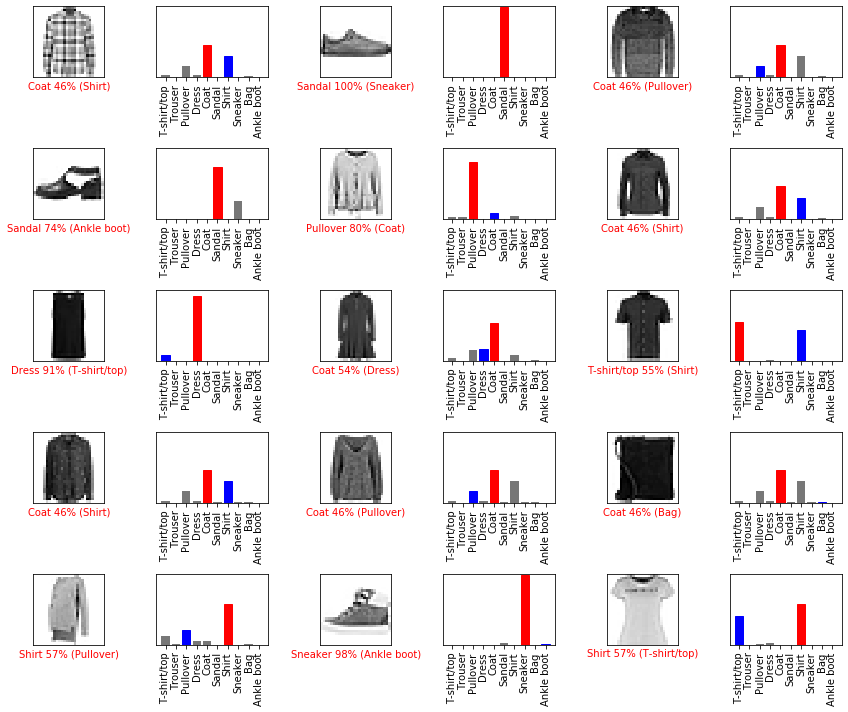

In [45]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
misclassified = np.where(class_predictions != test_labels)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i,j in zip(misclassified[0], range(num_images)):
    plt.subplot(num_rows, 2*num_cols, 2*j+1)
    plot_image(i, prediction_probabilities[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*j+2)
    plot_value_array(i, prediction_probabilities[i], test_labels)
plt.tight_layout()
plt.show()

Plot a confusion matrix of the predictions. Which misclassifications are the most common?

In [47]:
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=class_predictions).numpy()

In [48]:
con_mat

array([[633,   2,  10,  84,  34,   2, 226,   0,   9,   0],
       [  1, 942,  11,  39,   3,   0,   2,   0,   2,   0],
       [ 11,   3, 648,   9, 307,   0,  20,   0,   2,   0],
       [ 12,   5,   9, 858,  90,   0,  22,   0,   4,   0],
       [  0,   2, 108,  37, 846,   0,   7,   0,   0,   0],
       [  0,   0,   0,   0,   5, 897,   1,  50,  10,  37],
       [ 69,   0,  64,  51, 568,   0, 241,   0,   7,   0],
       [  0,   0,   0,   0,   0,  19,   0, 953,   0,  28],
       [  0,   0,   2,   3,  27,   3,  35,   4, 926,   0],
       [  1,   0,   0,   0,   1,   8,   0,  40,   0, 950]])